In [1]:
from brian2 import *

In [2]:
defaultclock.dt = 0.01*ms #setting the clock

In [3]:
#inserting system information
C = 281*pF
gL = 30*nS
EL = -70.6*mV
VT = -50.4*mV
DeltaT = 2*mV
tauw = 40*ms
a = 4*nS
b = 0.08*nA
I = .8*nA
Vcut = VT + 5 * DeltaT  # practical threshold condition
N = 200


In [4]:
#inserting nessesary equations
eqs = """
dvm/dt=(gL*(EL-vm)+gL*DeltaT*exp((vm-VT)/DeltaT)+I-w)/C : volt
dw/dt=(a*(vm-EL)-w)/tauw : amp
Vr:volt
"""

In [5]:
#setting the neuronal group
neuron = NeuronGroup(N, model=eqs, threshold='vm > Vcut',
                     reset="vm = Vr; w += b", method='euler')
neuron.vm = EL
neuron.w = a * (neuron.vm - EL)
neuron.Vr = linspace(-48.3 * mV, -47.7 * mV, N)  # bifurcation parameter


In [6]:
#starting the simulation
init_time = 3*second
run(init_time, report='text')  # we discard the first spikes


Starting simulation at t=0. s for a duration of 3. s
3. s (100%) simulated in 4s


In [7]:
#adding the spike monitor
states = StateMonitor(neuron, "w", record=True, when='start')
spikes = SpikeMonitor(neuron)
run(1 * second, report='text')


Starting simulation at t=3. s for a duration of 1. s
1. s (100%) simulated in 3s


In [8]:
# Get the values of Vr and w for each spike
Vr = neuron.Vr[spikes.i]
w = states.w[spikes.i, int_((spikes.t-init_time)/defaultclock.dt)]

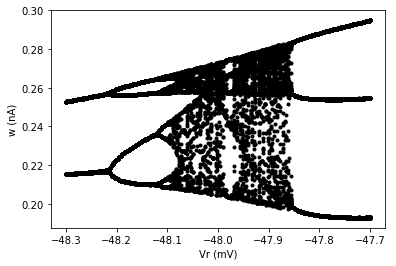

In [9]:
#plotting the graph
figure()
plot(Vr / mV, w / nA, '.k')
xlabel('Vr (mV)')
ylabel('w (nA)')
show()